# Домашнее задание № 2
## Тема: «Построение гипотез. A/B тестирование. Автотестирование гипотез»
### Формулировка задания:
#### Подготовка к проведению A/B тестирования гипотезы
#### Для выполнения задания выполнить следующие шаги:
1. Найти данные для анализа (таблица csv, xlsx в
открытом доступе).
2. Изучить данные (тема, типы столбцов, есть ли
зависимость между столбцами).
3. Составить список гипотез по данным. Предположения:
- Зависимость столбцов по датам, времени и другим
критериям;
- Численный показатель или критерий оценки;
- Насколько есть разница в данных по выбранному
числовому критериям оценки.
4. Выбрать одну из гипотез и подтвердить её или
опровергнуть.
5. (Дополнительно) В качестве критериев выбрать
статистические критерии. Например, критерий
Стьюдента и др.

In [1]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy
from scipy.stats import pearsonr
from scipy import stats
from seaborn import regplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn as sns

In [2]:
# Монтируем диск Google Colab.
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Считываем данные из диска Google Colab.
# df = pd.read_csv('/content/drive/MyDrive/Heart_Failure_Details.csv')

# Считываем данные из локального диска.
df = pd.read_csv('Heart_Failure_Details.csv')

In [4]:
df.info()
df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S no.                     299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection fraction         299 non-null    int64  
 6   high bp                   299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum creatinine          299 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  death                     299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


,S no.,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,sex,smoking,death
0,1,75.0,0,582,0,20,1,265000.00,1.9,1,0,1
1,2,55.0,0,7861,0,38,0,263358.03,1.1,1,0,1
2,3,65.0,0,146,0,20,0,162000.00,1.3,1,1,1
3,4,50.0,1,111,0,20,0,210000.00,1.9,1,0,1
4,5,65.0,1,160,1,20,0,327000.00,2.7,0,0,1
5,6,90.0,1,47,0,40,1,204000.00,2.1,1,1,1
6,7,75.0,1,246,0,15,0,127000.00,1.2,1,0,1


In [5]:
df.describe().round(2)

,S no.,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,sex,smoking,death
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,150.00,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,0.65,0.32,0.32
std,86.46,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,0.48,0.47,0.47
min,1.00,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,0.00,0.00,0.00
25%,75.50,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,0.00,0.00,0.00
50%,150.00,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,1.00,0.00,0.00
75%,224.50,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,1.00,1.00,1.00
max,299.00,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,1.00,1.00,1.00


In [6]:
# Сумма нулевых значений по столбцам (проверяем датасет на наличие пропусков).
df.isnull().sum()

S no.                       0
age                         0
anaemia                     0
creatinine phosphokinase    0
diabetes                    0
ejection fraction           0
high bp                     0
platelets                   0
serum creatinine            0
sex                         0
smoking                     0
death                       0
dtype: int64

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S no.                     299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection fraction         299 non-null    int64  
 6   high bp                   299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum creatinine          299 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  death                     299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


,S no.,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,sex,smoking,death
0,1,75.0,0,582,0,20,1,265000.00,1.9,1,0,1
1,2,55.0,0,7861,0,38,0,263358.03,1.1,1,0,1
2,3,65.0,0,146,0,20,0,162000.00,1.3,1,1,1
3,4,50.0,1,111,0,20,0,210000.00,1.9,1,0,1
4,5,65.0,1,160,1,20,0,327000.00,2.7,0,0,1


<Axes: >

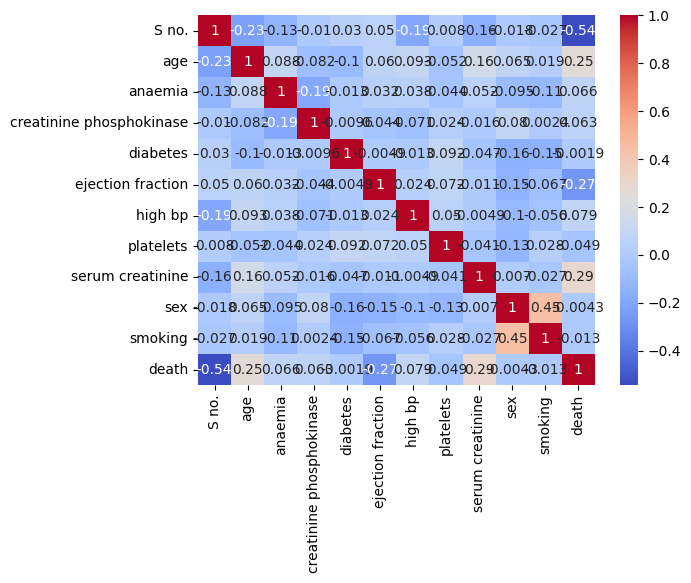

In [8]:
# Данный датасет содержит информацию о сердце и показатели сбоев пациентов.
# Исходя из данных датасета мы можем рассмотреть следующие вопросы:
#1. Существует ли положительная корреляция между параметром "Фракция выброса" и параметром "Тромбоциты"?
#2. Наблюдается ли зависимость между параметром "Тромбоциты" и параметром "Креатинфосфокиназа"?

# Потстроим матрицу корреляций.
matrix_corr = df.corr()

# Вывод корреляционной матрицы.
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm')

In [9]:
matrix_corr

,S no.,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,sex,smoking,death
S no.,1.000000,-0.226271,-0.134721,-0.010046,0.030481,0.050053,-0.193929,0.007991,-0.155842,-0.018183,-0.026890,-0.543600
age,-0.226271,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,0.065430,0.018668,0.253729
anaemia,-0.134721,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,-0.094769,-0.107290,0.066270
creatinine phosphokinase,-0.010046,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.079791,0.002421,0.062728
diabetes,0.030481,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.157730,-0.147173,-0.001943
ejection fraction,0.050053,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,-0.148386,-0.067315,-0.268603
high bp,-0.193929,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,-0.104615,-0.055711,0.079351
platelets,0.007991,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,-0.125120,0.028234,-0.049139
serum creatinine,-0.155842,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,0.006970,-0.027414,0.294278
sex,-0.018183,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,1.000000,0.445892,-0.004316


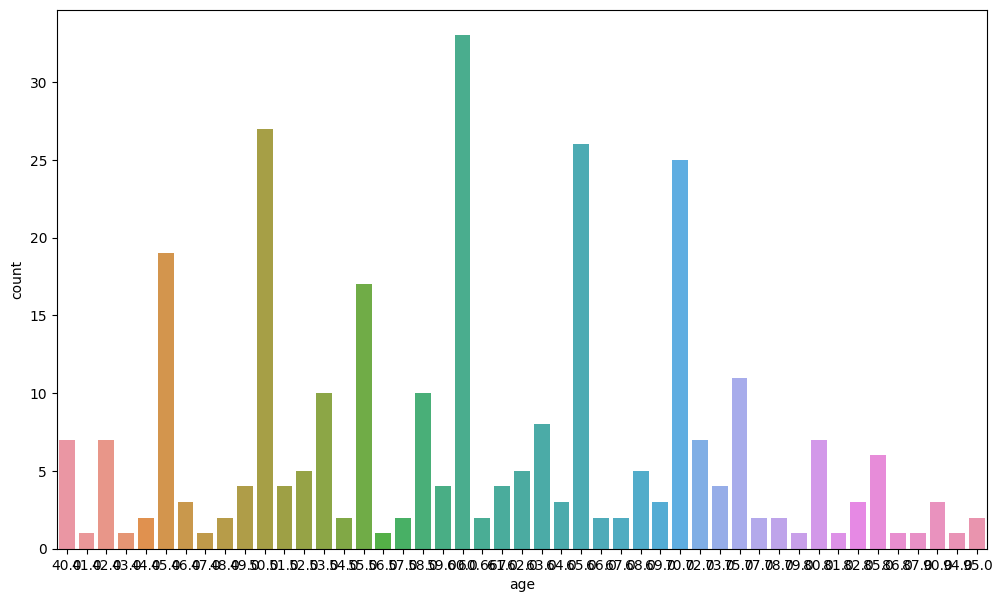

In [10]:
# Рассмотрим диаграмму измерения параметра "Возраст" пациентов.
fig = plt.subplots(figsize=(12, 7))
sns.countplot(x='age', data=df)
plt.show()

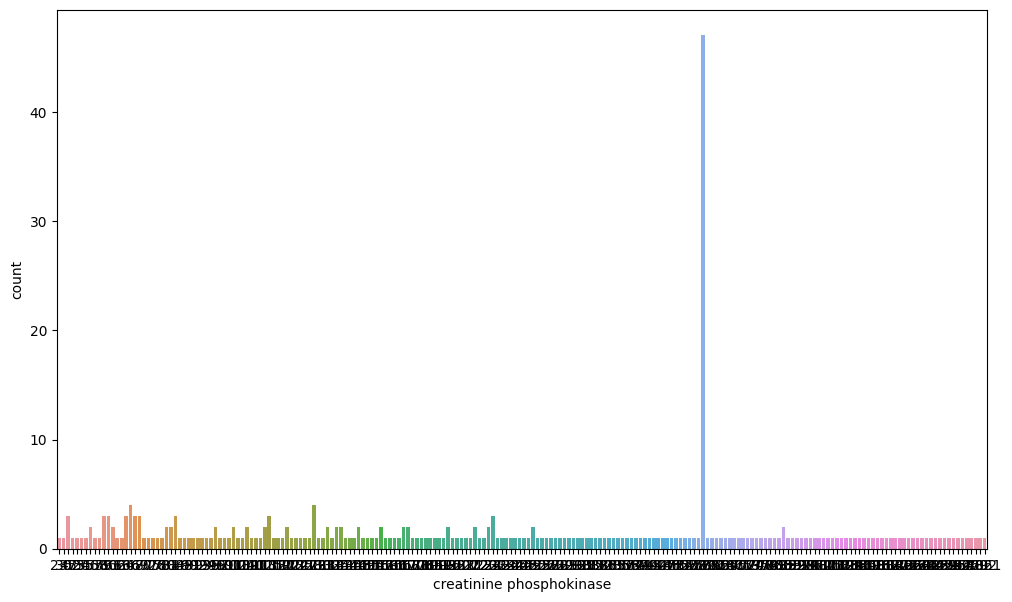

In [11]:
# Рассмотрим диаграмму измерения параметра "Креатинфосфокиназа" пациентов.
# Креатинкиназа (креатинфосфокиназа) — это фермент, который участвует в энергетическом обмене, протекающем в скелетных мышцах, сердце, головном мозге и других тканях.
# Повышение уровня общей креатинфосфокиназы (КФК) и ее изоформ в плазме приводит к острому инфаркту миокарда, острому инсульту, дерматомиозиту/полимиозиту, гипотиреозу, паранеопластическому синдрому.
fig = plt.subplots(figsize=(12, 7))
sns.countplot(x='creatinine phosphokinase', data=df)
plt.show()

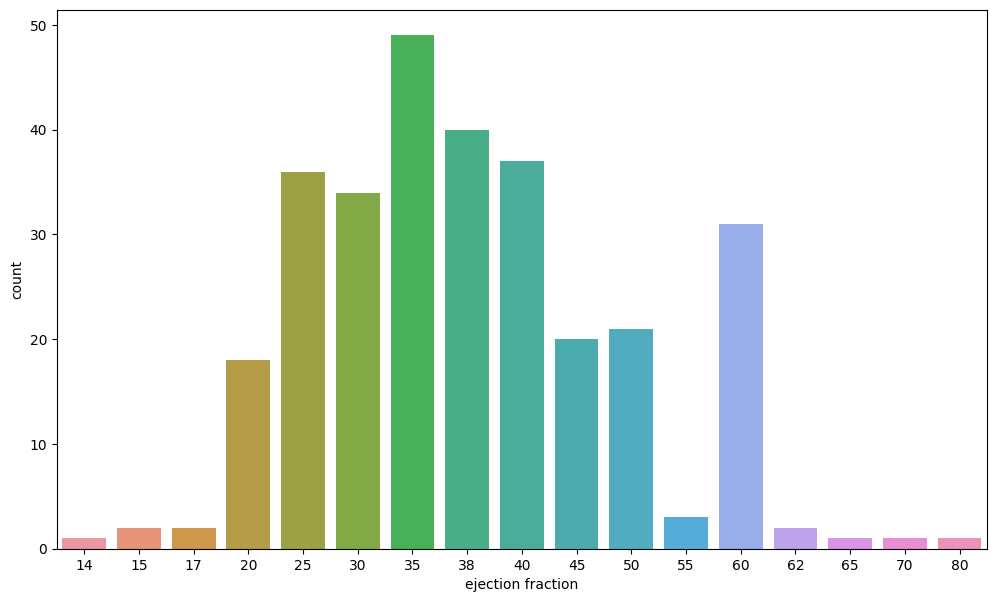

In [12]:
# Рассмотрим диаграмму измерения параметра "Фракция выброса" пациентов.
# Фракция выброса - это объемная доля жидкости, выбрасываемой из камеры при каждом сокращении.
# Относится к сердечному предсердию, желудочку, желчному пузырю или венам ног, хотя, если не указано иное, обычно относится к левому желудочку сердца.
fig = plt.subplots(figsize=(12, 7))
sns.countplot(x='ejection fraction', data=df)
plt.show()

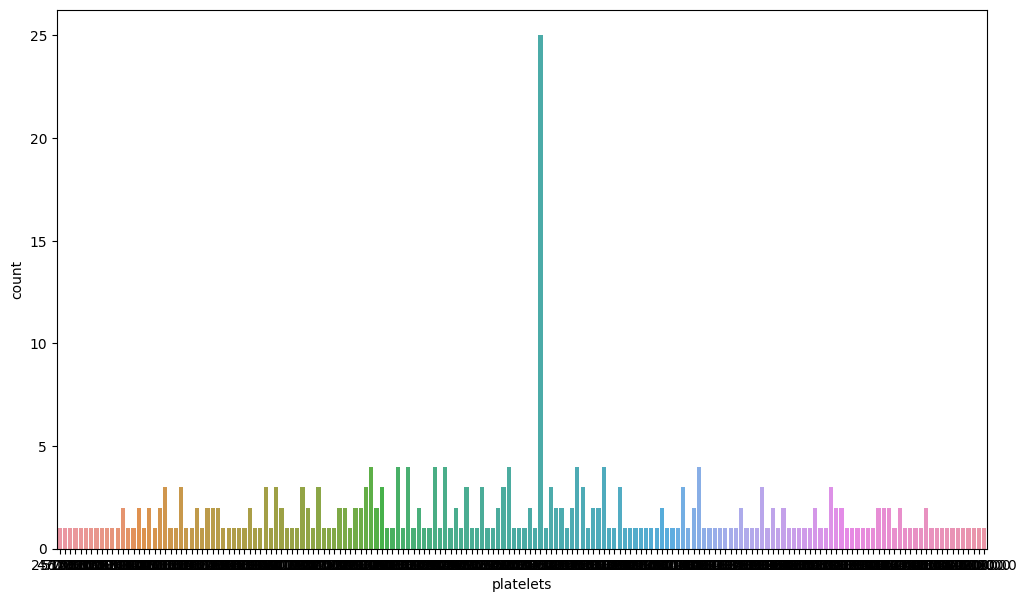

In [13]:
# Рассмотрим диаграмму измерения параметра "Тромбоциты" пациентов.
# Тромбоциты (кровяные пластинки) — элементы крови, которые отвечают за свёртывание.
# Они помогают остановить кровотечение и защищают от массивной кровопотери.
fig = plt.subplots(figsize=(12, 7))
sns.countplot(x='platelets', data=df)
plt.show()

## Гипотеза № 1.
### Параметр "Фракция выброса" оказывает влияние на "Тромбоциты".

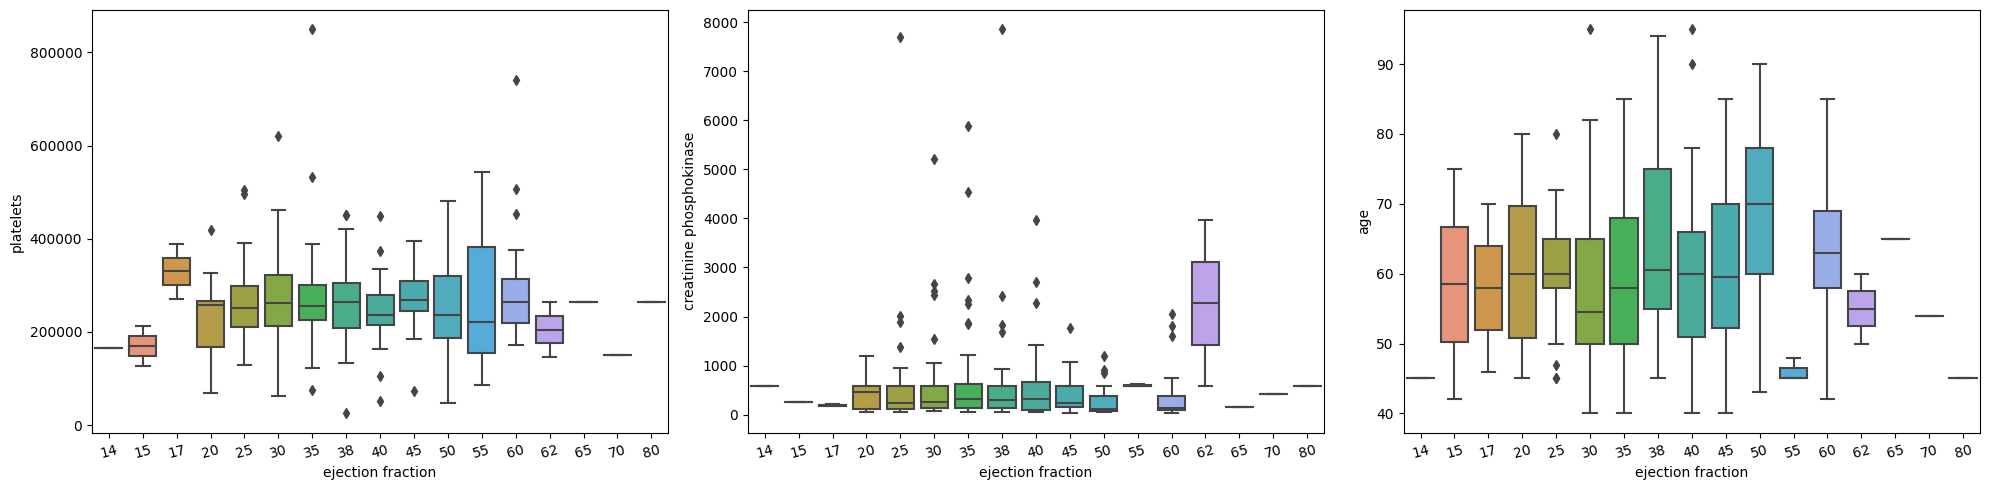

In [14]:
# Рассмотрим показатели "Тромбоциты", "Креатинфосфокиназа" и "Возраст" относительно параметра "Фракция выброса".
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.boxplot(ax=axes[0], x='ejection fraction', y='platelets', data=df)
sns.boxplot(ax=axes[1], x='ejection fraction', y='creatinine phosphokinase', data=df)
sns.boxplot(ax=axes[2], x='ejection fraction', y='age', data=df)
for i, ax in enumerate(fig.axes):
    axes[i].tick_params(axis='x', rotation=15)
plt.tight_layout()
plt.show()

In [15]:
# Вычисляем коэффициент корреляции Пирсона между параметром "Фракция выброса" и параметром "Тромбоциты".
corr1 = df['ejection fraction'].corr(df['platelets'])

# Выводим результаты
print(f'Корреляция между параметром "Фракция выброса" и параметром "Тромбоциты": {corr1:.3f}')

Корреляция между параметром "Фракция выброса" и параметром "Тромбоциты": 0.072


<Axes: xlabel='ejection fraction', ylabel='platelets'>

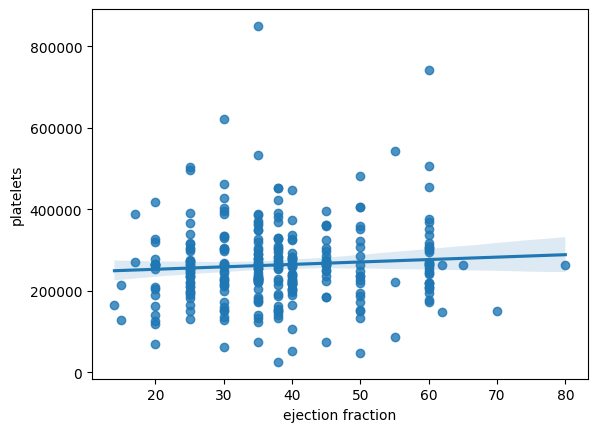

In [16]:
# Строим график зависимости между скоростью параметром "Фракция выброса" и параметром "Тромбоциты".
sns.regplot(x='ejection fraction', y='platelets', data=df)

In [17]:
# Коэффициент корреляции Пирсона составляет 0.072, что позволяет сделать вывод об отсутствие линейной связи между (параметром "Фракция выброса" и параметром "Тромбоциты")
# Гипотеза не подтверждена

## Гипотеза № 2.
### Параметр "Тромбоциты" оказывает влияние на "Креатинфосфокиназа".

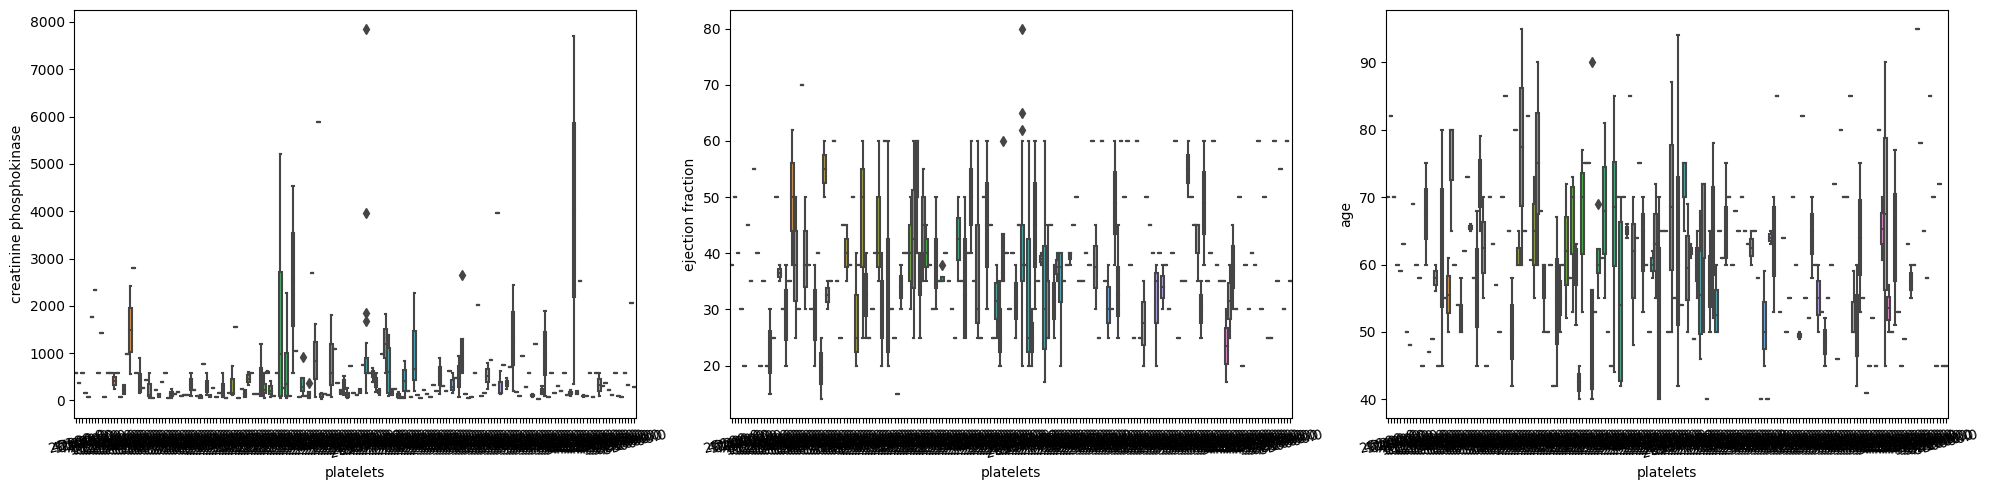

In [18]:
# Рассмотрим показатели "Креатинфосфокиназа", "Фракция выброса" и "Возраст" относительно параметра "Тромбоциты".
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.boxplot(ax=axes[0], x='platelets', y='creatinine phosphokinase', data=df)
sns.boxplot(ax=axes[1], x='platelets', y='ejection fraction', data=df)
sns.boxplot(ax=axes[2], x='platelets', y='age', data=df)
for i, ax in enumerate(fig.axes):
    axes[i].tick_params(axis='x', rotation=15)
plt.tight_layout()
plt.show()

In [19]:
# Вычисляем коэффициент корреляции Пирсона между параметром "Тромбоциты" и параметром "Креатинфосфокиназа".
corr0 = df['platelets'].corr(df['creatinine phosphokinase']);

# Выводим результаты
print(f'Корреляция между параметром "Тромбоциты" и параметром "Креатинфосфокиназа": {corr1:.3f}')

Корреляция между параметром "Тромбоциты" и параметром "Креатинфосфокиназа": 0.072


<Axes: xlabel='platelets', ylabel='creatinine phosphokinase'>

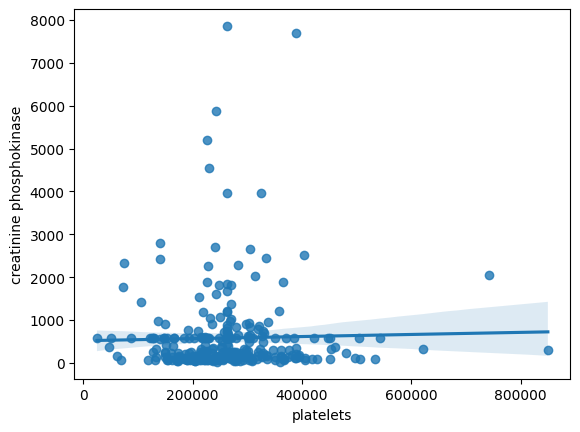

In [20]:
# Строим график зависимости между скоростью параметром "Тромбоциты" и параметром "Креатинфосфокиназа".
sns.regplot(x='platelets', y='creatinine phosphokinase', data=df)

<Axes: xlabel='platelets', ylabel='creatinine phosphokinase'>

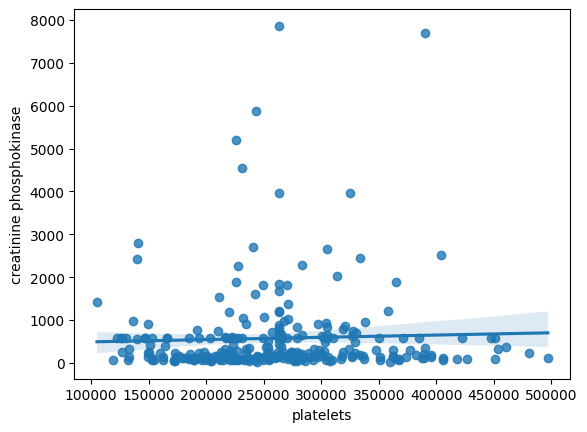

In [21]:
# Коэффициент корреляции Пирсона составляет 0.072, что позволяет сделать вывод об отсутствие линейной связи между (параметром "Тромбоциты" и параметром "Креатинфосфокиназа").
# Гипотеза не подтверждена

# Фильтруем данные по параметру "Тромбоциты".
df_filtered = df.loc[(df['platelets'] >= 100000) & (df['platelets'] <= 500000)]

# Строим график зависимости между параметром "Тромбоциты" и параметром "Креатинфосфокиназа" (с учём выборки).
sns.regplot(x='platelets', y='creatinine phosphokinase', data=df_filtered)


In [22]:
# Вычисляем коэффициент корреляции Пирсона между  параметром "Тромбоциты" и параметром "Креатинфосфокиназа".
corr3 = df_filtered['platelets'].corr(df_filtered['creatinine phosphokinase']);

# Выводим результаты.
print(f'Корреляция между параметром "Тромбоциты" и параметром "Креатинфосфокиназа": {corr3:.3f}')

Корреляция между параметром "Тромбоциты" и параметром "Креатинфосфокиназа": 0.040


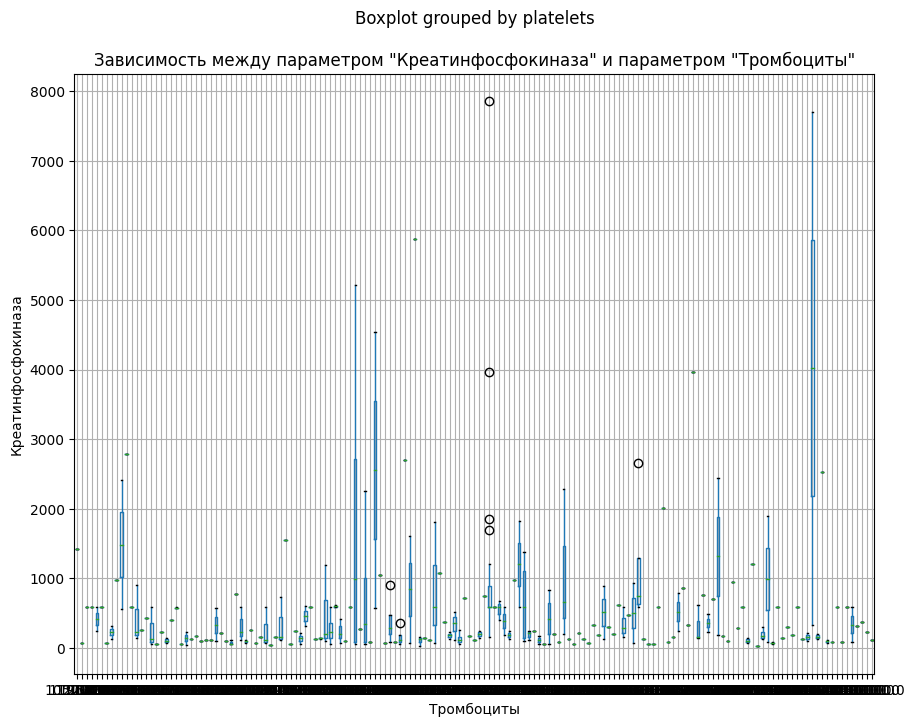

In [23]:
df_filtered.boxplot(column=['creatinine phosphokinase'], by='platelets', figsize=(10,8))
plt.title('Зависимость между параметром "Креатинфосфокиназа" и параметром "Тромбоциты"')
plt.ylabel('Креатинфосфокиназа')
plt.xlabel('Тромбоциты')
plt.show()

In [24]:
# Коэффициент корреляции Пирсона составляет 0.040, что позволяет сделать вывод об отсутствие линейной связи между (параметром "Тромбоциты" и параметром "Креатинфосфокиназа").
# Гипотеза не подтверждена (прослеживается незначительное увеличение линейной связи между параметром "Тромбоциты" и параметром "Креатинфосфокиназа", по мере увеличения параметра "Тромбоциты")

# Таким образом, ни одна из рассматриваемых гипотез не нашла в ходе анализа своего подтверждения.

# Гипотеза № 1: Параметр "Фракция выброса" оказывает влияние на "Тромбоциты" - НЕ ПОДТВЕРДИЛАСЬ.
# Для проверки данной гипотезы был использован метод Пирсона (его показатель составил 0.072) и графики корреляции, которые указывают на отсутствие линейной связи между рассматриваемыми переменными

# Гипотеза № 2: Параметр "Тромбоциты" оказывает влияние на "Креатинфосфокиназа" - НЕ ПОДТВЕРДИЛАСЬ.
# Для проверки данной гипотезы также был использован метод Пирсона (его показатель составил 0.072) и графики корреляции, которые указывают на отсутствие линейной связи между рассматриваемыми переменными.

## Выполним расчет Т-статистики.

In [25]:
# отпределяем размер выборки.
n = df['platelets']
n = 816

# Рассчитаем гауссовские распределенные данные.
x = np.random.randn(n) + 2
y = np.random.randn(n)
var_x = x.var(ddof = 1)
var_y = y.var(ddof = 1)

# Рассчитаем стандартное отклонение.
SD = np.sqrt((var_x + var_y) / 2)
print('Стандартное отклонение = ', SD)

# Вычисляем T-статистику
tval =(x.mean() - y.mean()) /(SD * np.sqrt(2 / n))

# Сравним ее с критическим значением T (для этого мы вычислили степени свободы и сравним значение p).
dof = 2 * n - 2

pval = 1 - stats.t.cdf( tval, df = dof)
print("t = " + str(tval))
print("p = " + str(2 * pval))

tval2, pval2 = stats.ttest_ind(x, y)
print("t = " + str(tval2))
print("p = " + str(pval2))

Стандартное отклонение =  1.002115349801748
t = 39.75901693286005
p = 0.0
t = 39.75901693286004
p = 3.1241975012114483e-242
